In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset_train = pd.read_csv('GOOG train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [5]:
X_train = []
y_train = []
for i in range(60, 990):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN
### Importing the Keras libraries and packages
### Initialising the RNN
### Adding the first LSTM layer and some Dropout regularisation
### Adding a second LSTM layer and some Dropout regularisation
### Adding a third LSTM layer and some Dropout regularisation
### Adding a fourth LSTM layer and some Dropout regularisation
### Adding the output layer
### Compiling the RNN

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
regressor = Sequential()

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(Dense(units = 1))

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [15]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 10s 116ms/step - loss: 0.0543
Epoch 2/100
30/30 [==============================] - 3s 88ms/step - loss: 0.0063
Epoch 3/100
30/30 [==============================] - 3s 93ms/step - loss: 0.0045
Epoch 4/100
30/30 [==============================] - 4s 125ms/step - loss: 0.0043
Epoch 5/100
30/30 [==============================] - 3s 116ms/step - loss: 0.0045
Epoch 6/100
30/30 [==============================] - 3s 105ms/step - loss: 0.0043
Epoch 7/100
30/30 [==============================] - 3s 100ms/step - loss: 0.0035
Epoch 8/100
30/30 [==============================] - 3s 110ms/step - loss: 0.0039
Epoch 9/100
30/30 [==============================] - 3s 90ms/step - loss: 0.0031
Epoch 10/100
30/30 [==============================] - 3s 112ms/step - loss: 0.0105
Epoch 11/100
30/30 [==============================] - 4s 118ms/step - loss: 0.0041
Epoch 12/100
30/30 [==============================] - 3s 108ms/step - loss: 0.0031
Epoch 13/100
30

30/30 [==============================] - 4s 126ms/step - loss: 0.0014
Epoch 100/100
30/30 [==============================] - 3s 112ms/step - loss: 9.8100e-04


In [18]:
dataset_test = pd.read_csv('GOOG test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2021

In [19]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

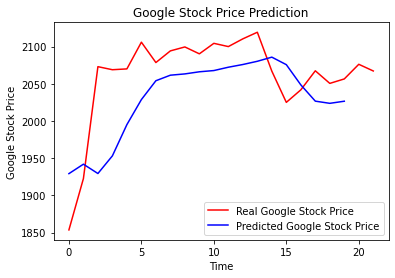

In [20]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()